## CLASE 2

In [1]:
#Librerias
import numpy as np
class Perceptron(object):
    """Perceptron classifier.
    Parametros
    ------------
    #Tasa de aprendizaje
    eta : float
        Learning rate (entre 0.0 y 1.0)
        #Tasa de aprendizaje
    n_iter : int
        Cantidad de épocas de entrenamiento.
    random_state : int
        Semilla del generador de números aleatorios para
        la inicializacion de pesos aleatorios.
    Atributos
    -----------
    w_ : 1d-array
        Vector de peso después del entrenamiento.
        #Nota? , la mejor es 0
    errors_ : list
        Número de clasificaciones erróneas (actualizaciones) en cada época.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Entrenamiento.
        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Vector de entrenamiento, donde n_samples es el número de muestras y
            n_features es el número de características.
        y : array-like, shape = [n_samples]
            Valor de salida.
        Returns
        -------
        self : object
        """
    
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Calcular entrada neta, z"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Etiqueta de clase después del paso unitario"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,encoding='utf-8')
df.columns = ['sepal_len','sepal_wid','petal_len','sepal_wid','class']
df.head(5)

,sepal_len,sepal_wid,petal_len,sepal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe(include='all')

,sepal_len,sepal_wid,petal_len,sepal_wid,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


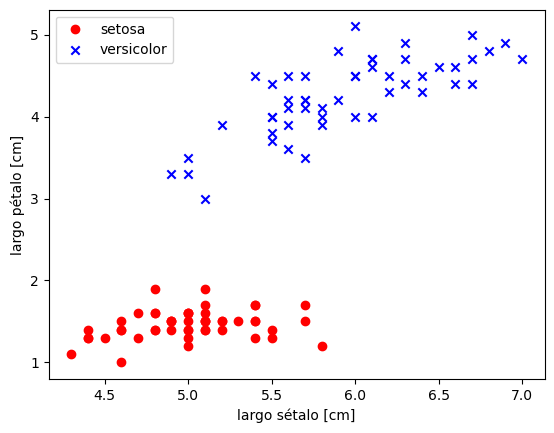

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x',label='versicolor')
plt.xlabel('largo sétalo [cm]')
plt.ylabel('largo pétalo [cm]')
plt.legend(loc='upper left')

#plt.savefig('02_06.png', dpi=300)
plt.show()

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
for i in range(len(ppn.w_)):
    print('w[{}] = {}'.format(i,ppn.w_[i]))

w[0] = -0.3837565463633676
w[1] = -0.7061175641365005
w[2] = 1.8347182824773658


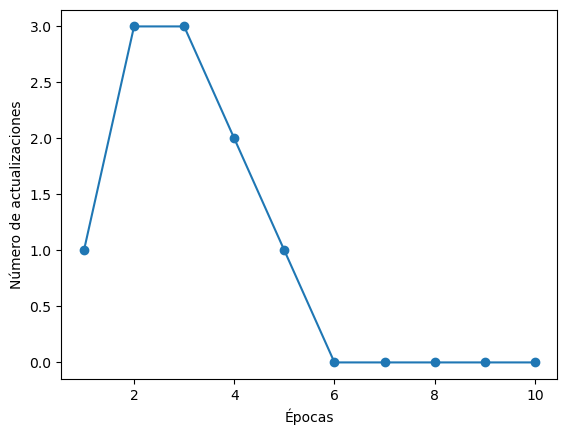

In [6]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

#plt.savefig('02_07.png', dpi=300)
plt.show()

In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        if cl == -1:
            label = 'setosa'
        else:
            label = 'versicolor'
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx], label=label,edgecolor='black')

C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_28356\4268080766.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx], label=label,edgecolor='black')


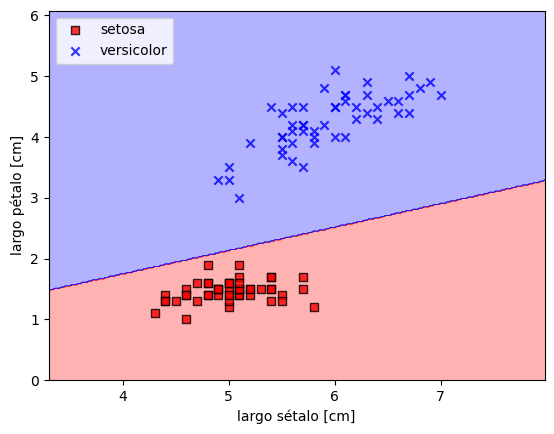

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('largo sétalo [cm]')
plt.ylabel('largo pétalo [cm]')
plt.legend(loc='upper left')
#plt.savefig('02_08.png', dpi=300)
plt.show()

## CLASE 3
Implementación Adaline con Python

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parametros
    ------------
    eta : float
    Learning rate (entre 0.0 y 1.0)
    n_iter : int
    Cantidad de épocas de entrenamiento.
    random_state : int
    Semilla para generar pesos aleatorios.
    Atributos
    -----------
    w_ : 1d-array
    Vector de pesos al término del entrenamiento.
    cost_ : list
    Valor de la función de costo en cada época."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """Entrenamiento
        
        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Vector de entrenamiento, donde n_samples es el número de muestras y
        n_features es el número de características.
        y : array-like, shape = [n_samples]
        Valor de salida (etiquetas).
        Returns
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
    #Calcular entrana neta, z"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
    #Calcular activación lineal
        return X
    def predict(self, X):
    #Etiqueta de clase después del paso unitario
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header=None,encoding='utf-8')
df.columns = ['sepal_len','sepal_wid','petal_len','petal_wid','class']
df.head(3)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [11]:
df.describe(include='all')

,sepal_len,sepal_wid,petal_len,petal_wid,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


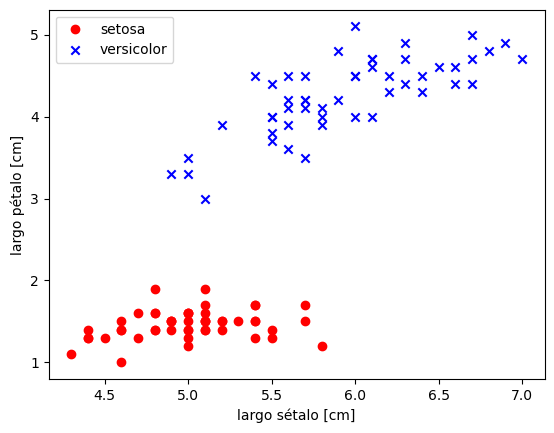

In [12]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

#Ploteo
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('largo sétalo [cm]')
plt.ylabel('largo pétalo [cm]')
plt.legend(loc='upper left')
#plt.savefig('02_06.png', dpi=300)
plt.show()

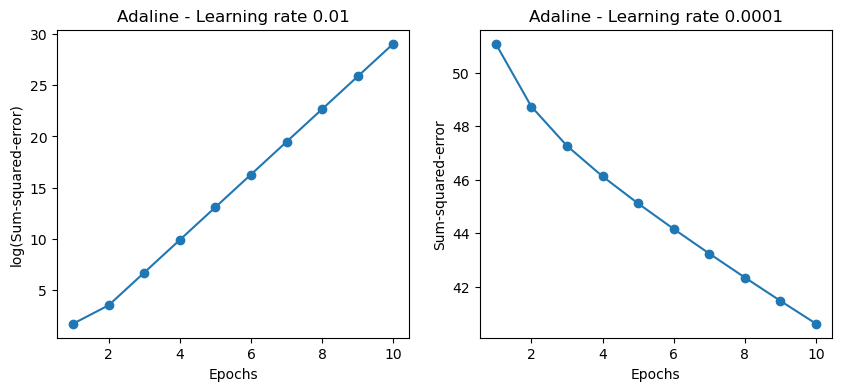

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

#ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
#plt.savefig('02_11.png', dpi=300)

plt.show()

In [14]:
#Image(filename=r'./Imagenes/imagen3.png', width=700)

In [15]:
X_std=np.copy(X)

##ESTANDARIZAR

#xj = X ; uj = media; oj = desv estandar
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean())/X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean())/X_std[:,1].std()

In [16]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        if cl == -1:
            label = 'setosa'
        else:
            label = 'versicolor'
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx], label=label,edgecolor='black')

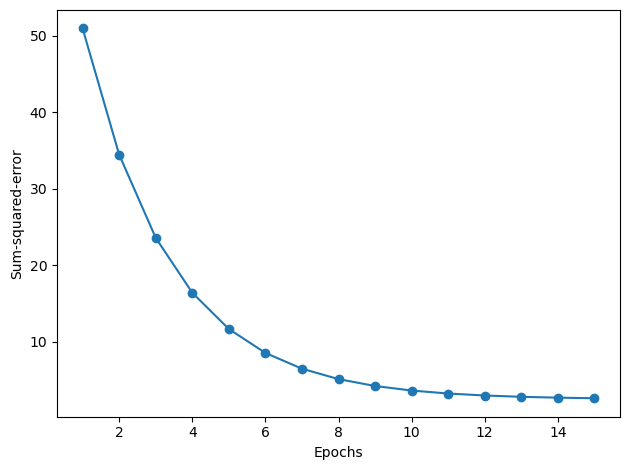

In [17]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_28356\4268080766.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx], label=label,edgecolor='black')


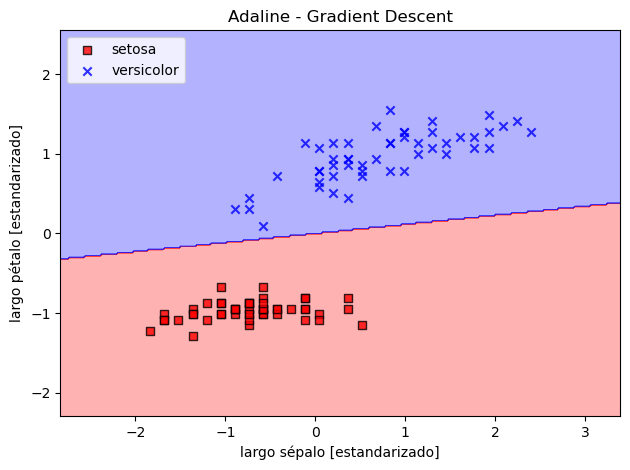

In [18]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('largo sépalo [estandarizado]')
plt.ylabel('largo pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

4. Descenso de Gradiente Estocástico (SGD)

In [19]:
class AdalineSGD(object):
    
    """ADAptive LInear NEuron classifier.
    
    Parametros
    ------------
    eta : float
    Learning rate (entre 0.0 y 1.0)
    n_iter : int
    Cantidad de épocas de entrenamiento.
    shuffle : bool (default: True)
    Si es True, mezcla los datos de entrenamiento cada época, para evitar ciclos..
    random_state : int
    Semilla para generar pesos aleatorios.
    
    Atributos
    -----------
    w_ : 1d-array
    Vector de pesos al término del entrenamiento.
    cost_ : list
    Valor de la función de costo en cada época.
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Entrenamiento.
        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Vector de entrenamiento, donde n_samples es el número de muestras y
        n_features es el número de características.
        y : array-like, shape = [n_samples]
        Valor de salida (etiquetas).
        
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
    #Ajustar los datos de entrenamiento sin reiniciar los pesos
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
            else:
                self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
    #Barajar datos de entrenamiento
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
    #Inicializar pesos con pequeños números aleatorios
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
    #Aplicar la regla de aprendizaje de Adaline para actualizar los pesos
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
    #Calcular entrana neta, z
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
    #Calcular activación lineal
        return X
    
    def predict(self, X):
    #Etiqueta de clase después del paso unitario
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

C:\Users\Javiera Carrasco\AppData\Local\Temp\ipykernel_28356\4268080766.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx], label=label,edgecolor='black')


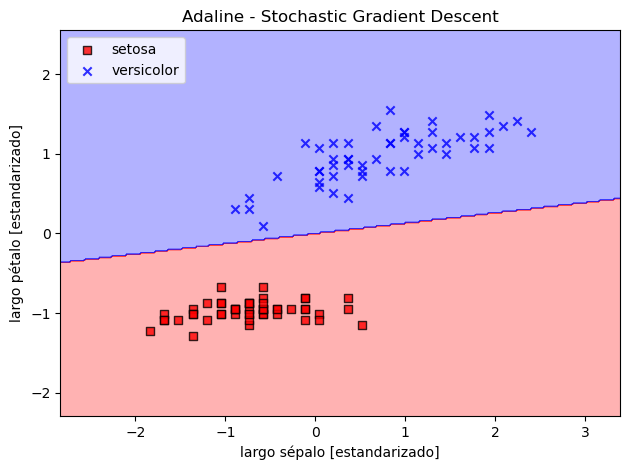

In [20]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('largo sépalo [estandarizado]')
plt.ylabel('largo pétalo [estandarizado]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

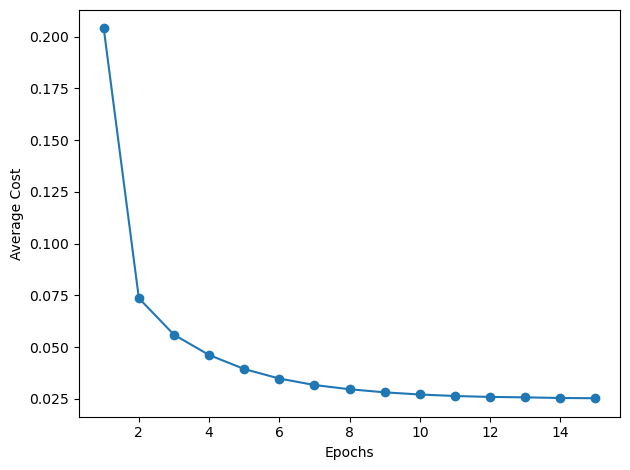

In [21]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
#plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

¿Cómo realizar predicciones?

In [22]:
x_test = np.array([[0.1,0.5],[0.0001,0.9],[0.3,0.001]])
x_test.shape

(3, 2)

In [23]:
ada.predict(x_test)
ada_sgd.predict(x_test)

NameError: name 'ada_sgd' is not defined

In [ ]:
ada.net_input(x_test)